In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("hf://datasets/Rodrigopiva/Social_Network_Ads.csv/Social_Network_Ads.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
oh_encoder = OneHotEncoder()

data_gender = oh_encoder.fit_transform(df[['Gender']])

data_gender = pd.DataFrame(data_gender.toarray(), columns=oh_encoder.get_feature_names_out())

In [22]:
data = pd.concat([df, data_gender], axis=1)

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0.0,1.0
1,15810944,Male,35,20000,0,0.0,1.0
2,15668575,Female,26,43000,0,1.0,0.0
3,15603246,Female,27,57000,0,1.0,0.0
4,15804002,Male,19,76000,0,0.0,1.0


In [30]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


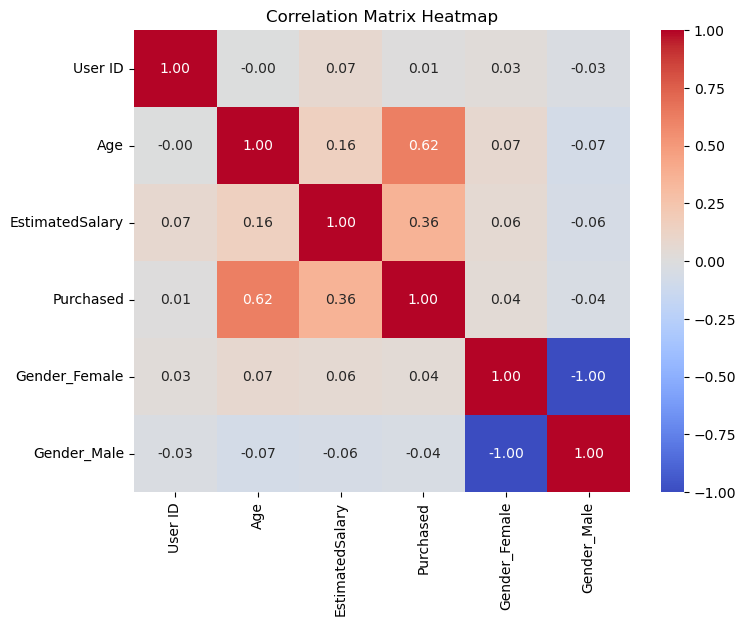

In [33]:
plt.figure(figsize=(8, 6))

# Draw the heatmap
sb.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>],
       [<Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>]], dtype=object)

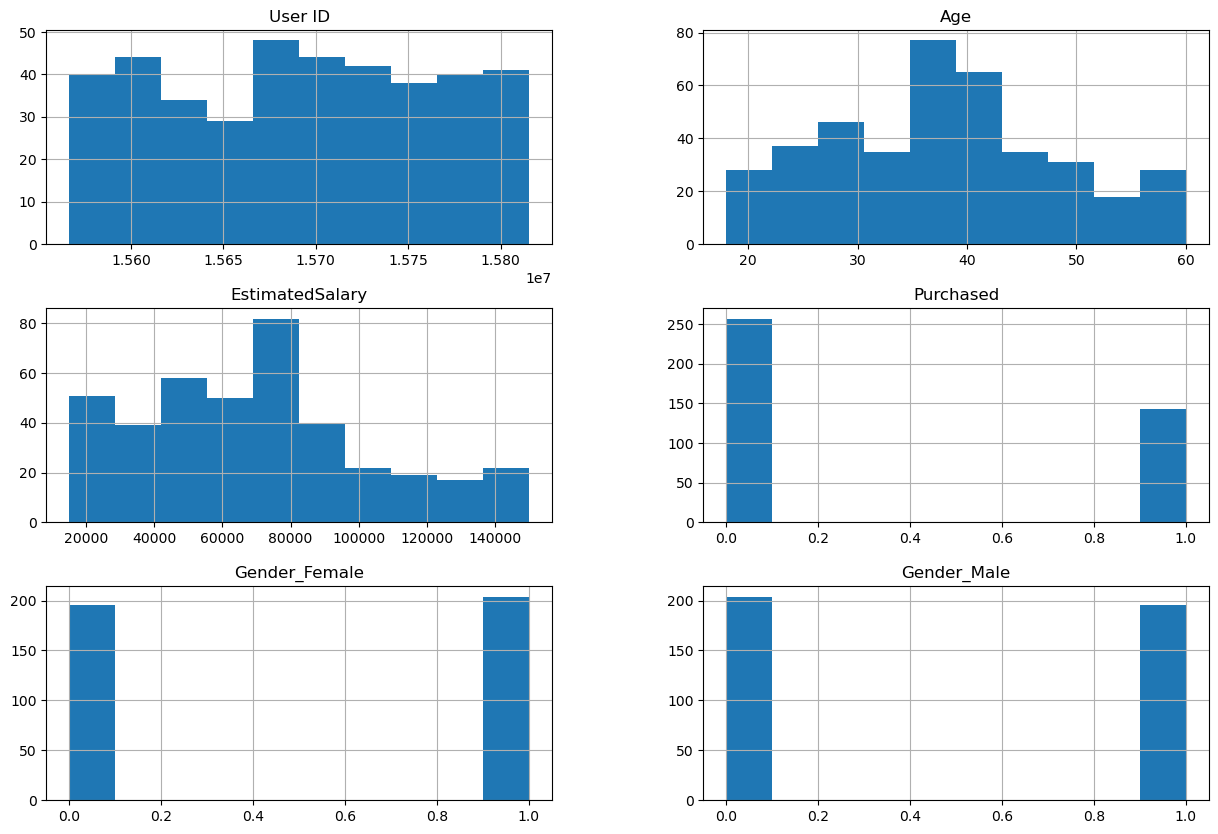

In [35]:
data.hist(figsize=(15,10))

In [37]:
x_values = data.iloc[:, [2,3,5,6]]
y_values = data.iloc[:, [4]]

std_scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [38]:
knn = KNeighborsClassifier(metric='minkowski', p=1)

knn.fit(x_train, y_train)

predictions = knn.predict(x_test)

/home/emanuel/Developer/Personal/learning-ia/ml-knn/.conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precision Score:  0.8666666666666667
Recall Score:  0.9285714285714286
F1 Score:  0.896551724137931


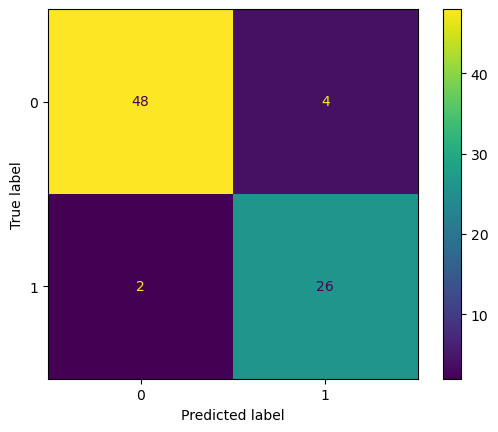

In [39]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)

cmdisp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=knn.classes_)
cmdisp.plot()
plt.show()